In [9]:
#load dataset for supervised training
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['malignant_or_benign'])
df = pd.concat([X, y], axis=1)
display(df.head())

#import other library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  malignant_or_benign  
0          0.4601                  0.11890                    0  
1          0.2750                  0.08902                    0  
2          0.3613                  0.08758                    0  
3          0.6638                  0.17300                    0  
4          0.2364                  0.07678                    0  

[5 rows x 31 columns]

In [10]:
#divide feature
mean_of_feature = pd.concat([X.iloc[:, :10], y], axis=1)
error_of_feature = pd.concat([X.iloc[:, 10:20], y], axis=1)
worst_of_feature = pd.concat([X.iloc[:, 20:], y], axis=1)

In [11]:
#calculate statistics
print(mean_of_feature.describe())
print(error_of_feature.describe())
print(worst_of_feature.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

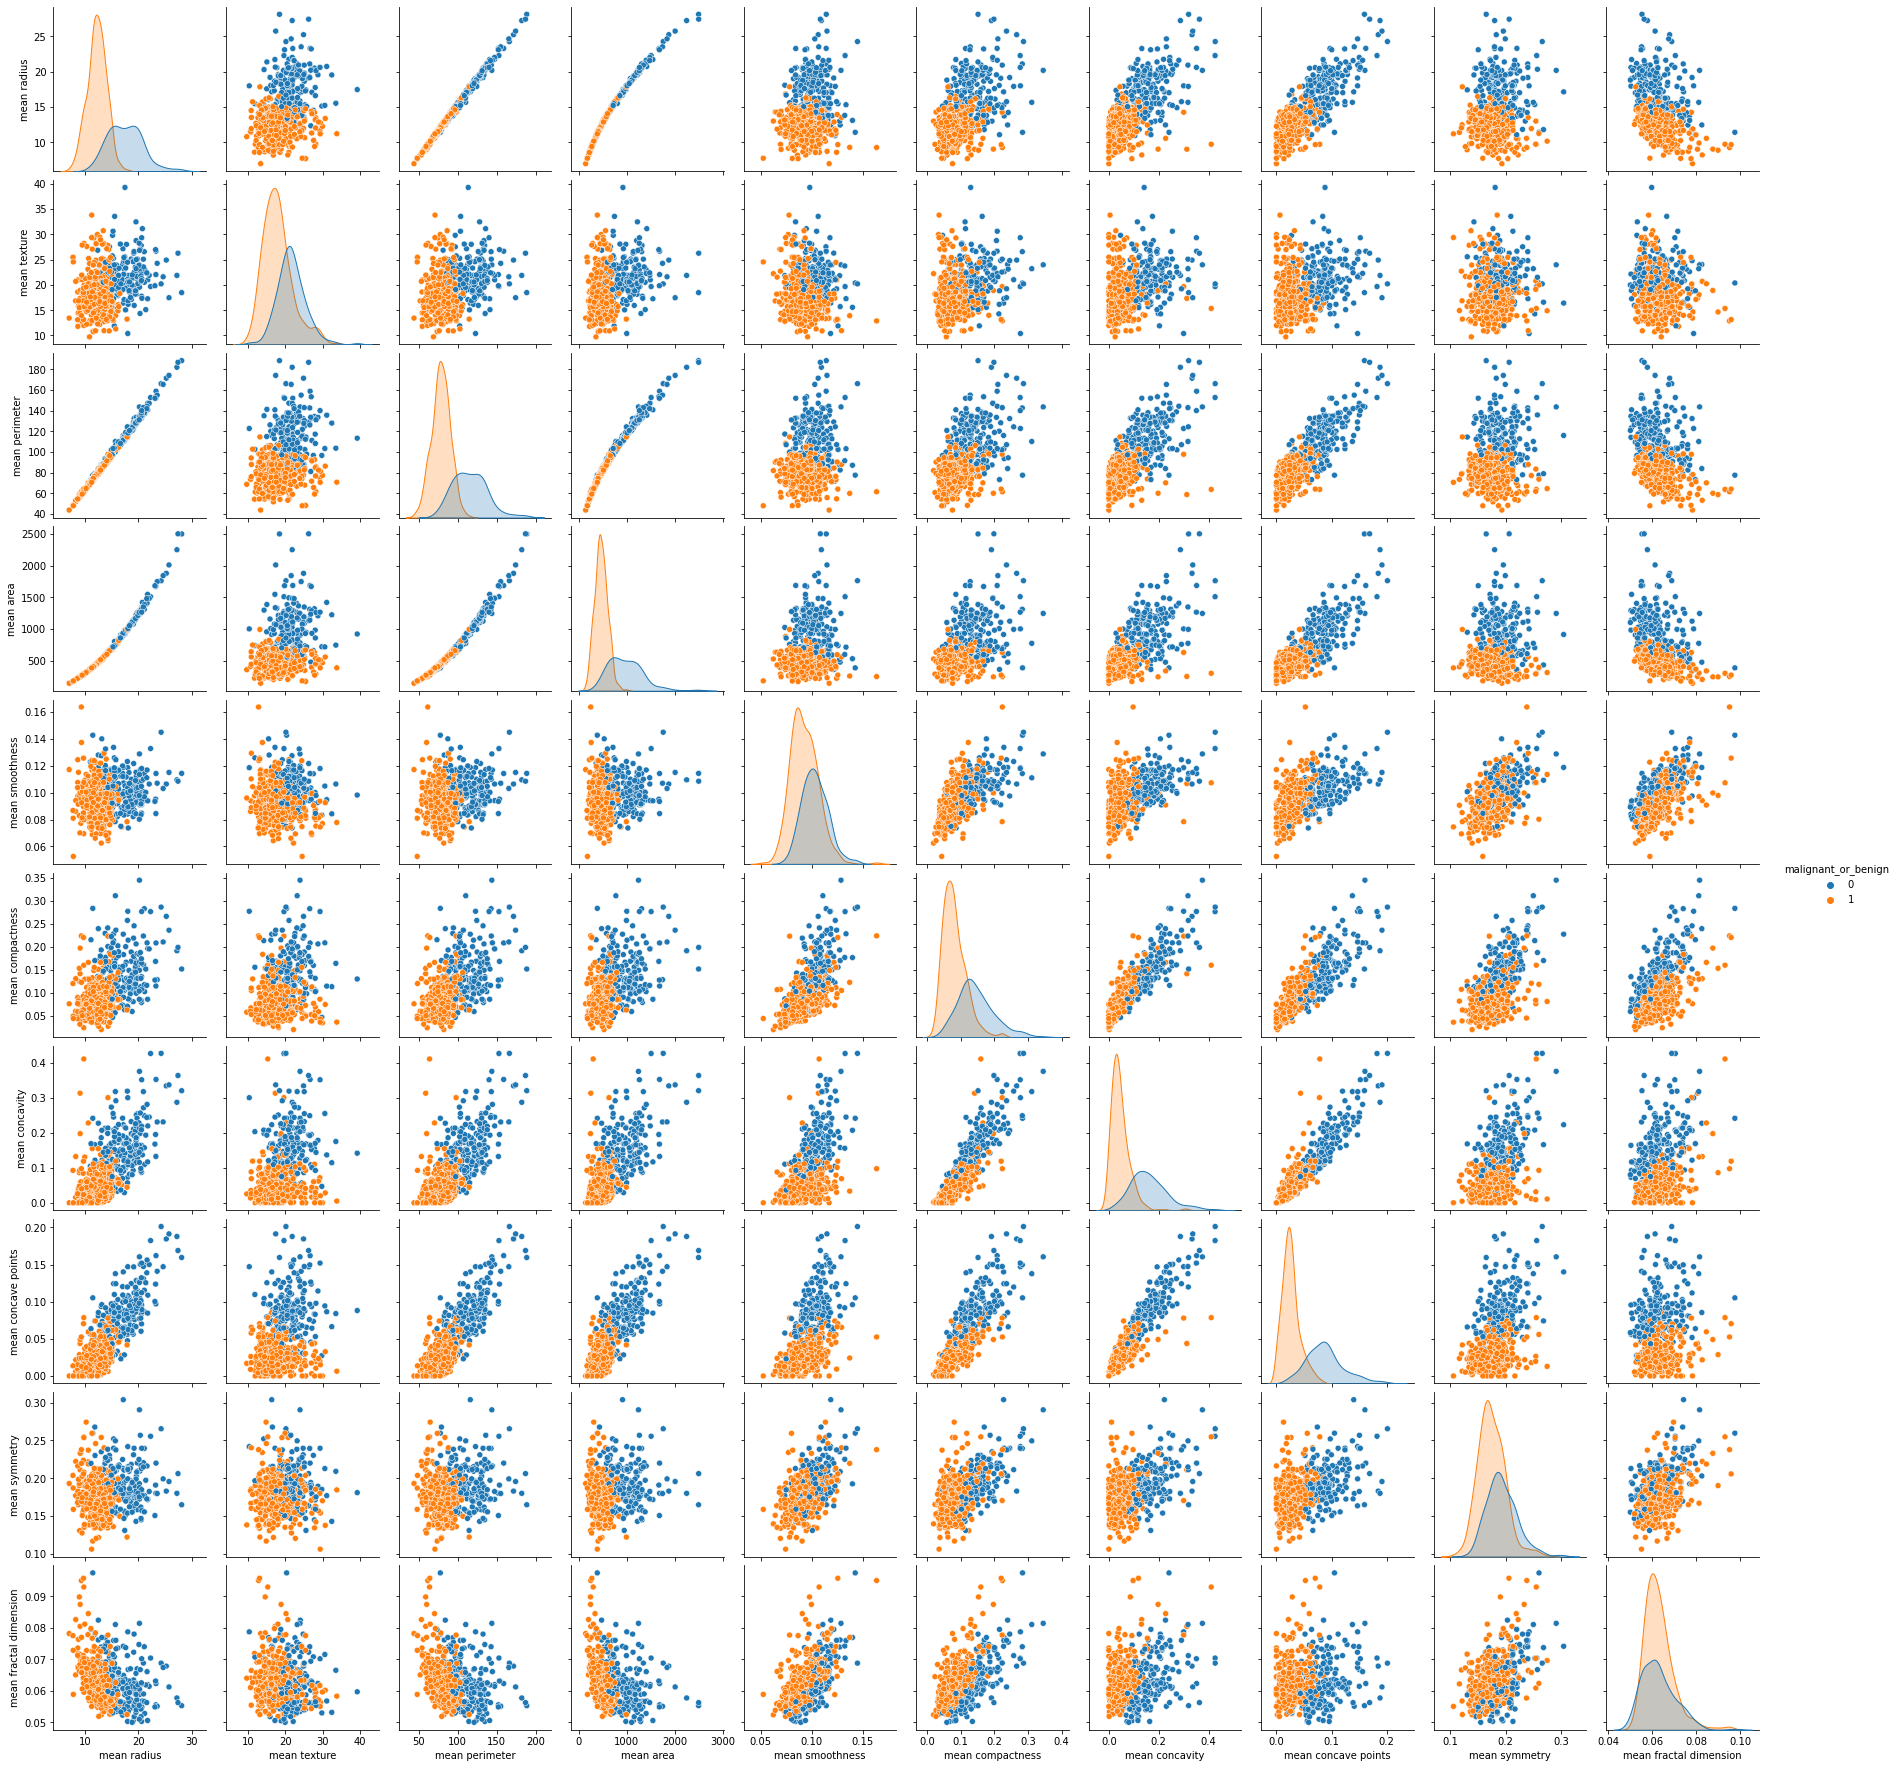

In [13]:
#plot correlation matrix
sns.pairplot(data=mean_of_feature, hue='malignant_or_benign')

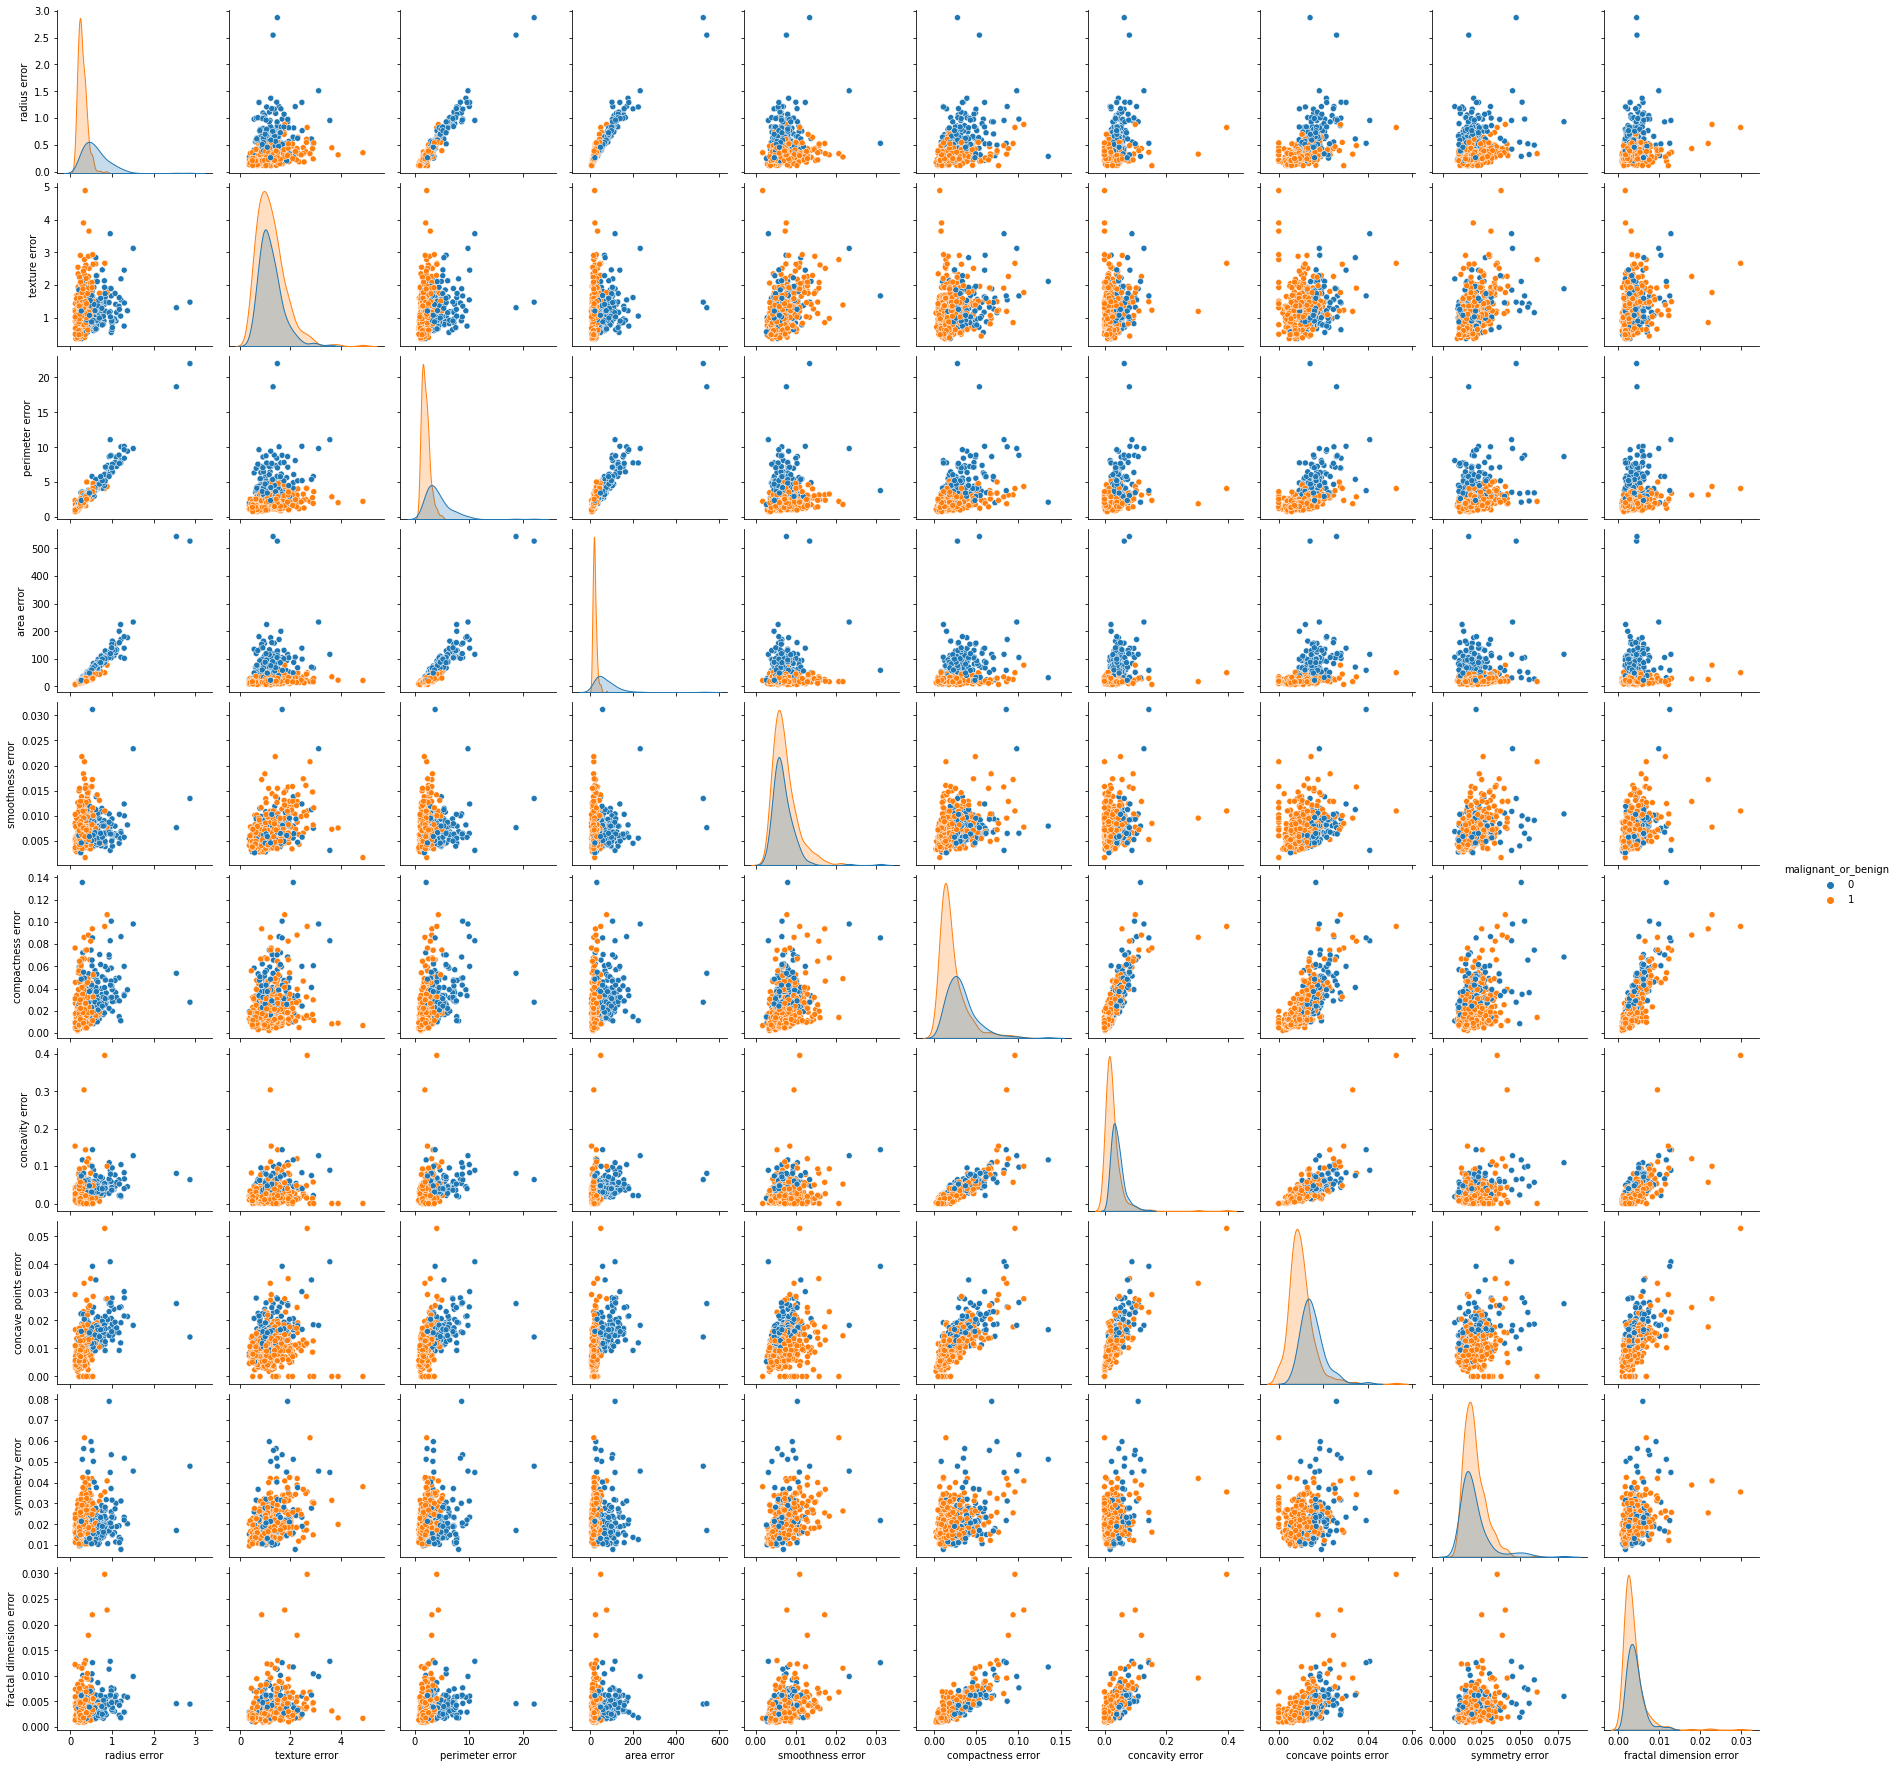

In [14]:
#plot correlation matrix
sns.pairplot(data=error_of_feature, hue='malignant_or_benign')

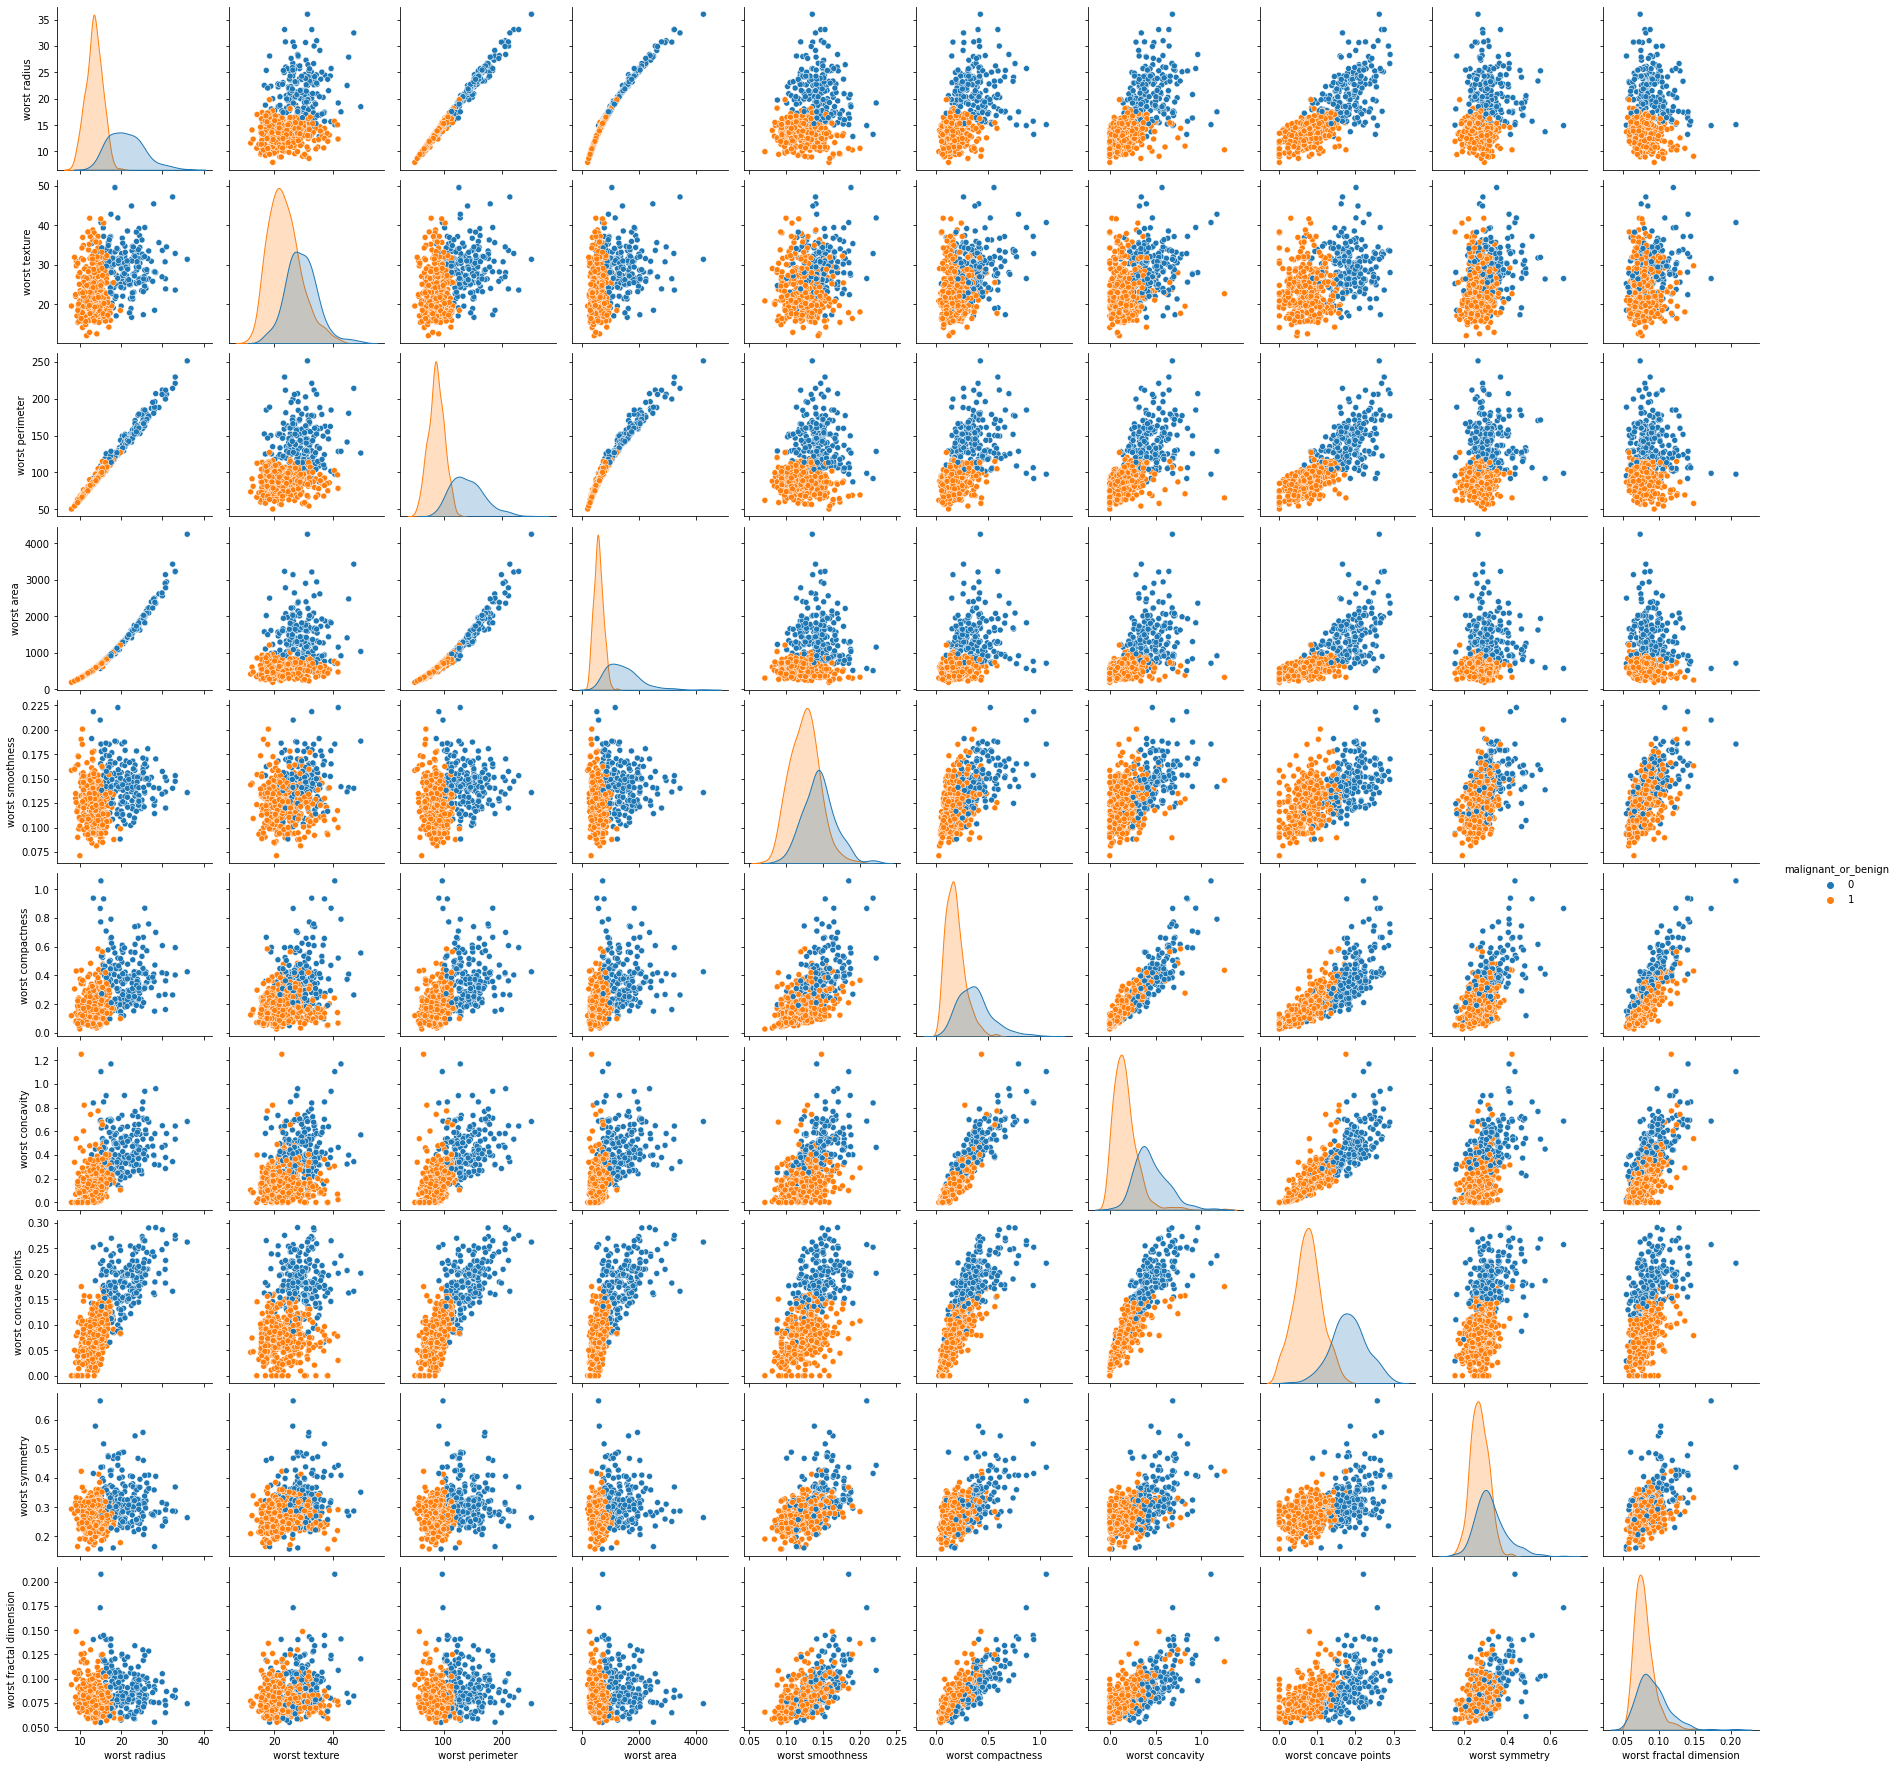

In [15]:
#plot correlation matrix
sns.pairplot(data=worst_of_feature, hue='malignant_or_benign')

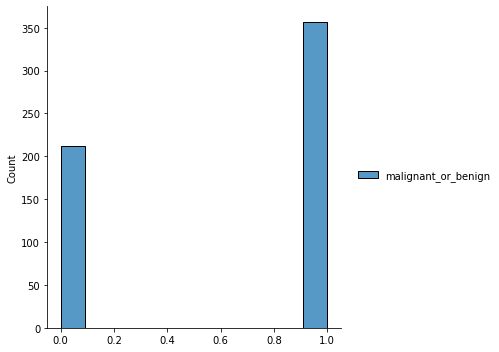

In [16]:
#plot distribution of target
sns.displot(data=y)

In [19]:
#split data to training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mean_of_feature.iloc[:, :-1], mean_of_feature.iloc[:, -1], test_size=0.3, random_state=0)

In [20]:
#make learning model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
#train model
model.fit(X_train, y_train)
#predict class and probability
print(model.predict(X_test))
# print(model.predict_proba(X_test))

[1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1]


In [27]:
#verify accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.9181286549707602

In [26]:
#show feature importance
model.coef_

array([[ 4.43803517, -0.15747975, -0.49120368, -0.02299483, -0.1977349 ,
        -0.88107831, -1.17436636, -0.51610975, -0.32416124, -0.06441917]])